<a href="https://colab.research.google.com/github/Papitasrancheras/Extraccion_de_caracteristicas/blob/main/Act4_Ext_Car.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad 4 
### Luis Alberto Mirón Toruño 

In [105]:
#!pip install --upgrade pip
#!pip install --upgrade setuptools
#!pip install --upgrade wheel

In [106]:
#Instalamos librería para análisis de variables categóricas
%pip install funpymodeling 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [107]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl 
import plotly.express as px

In [108]:
["232_type_of_store", "186_internet_connection","210_sales_channels", "189_payment_methods", "33_credit_to_customers"]
["214_customer_relationship_tools", "227_agreement_ecommerce_platforms", "193_sales_planning_tools", "192_procurement_planning_tools", "162_inventory_extra_space"]
["264_technology_budget", "249_technology_training", "99_does_the_micro_retailer_exhibits_products_outside_", "102_does_the_micro_retailer_sells_fresh_products_", "49_inventory_records"]
["18_sales_records", "155_sales_registers_used_for", "79_delivery_vehicle", "250_technology_investment_operations", "261_technology_organization" ]

['18_sales_records',
 '155_sales_registers_used_for',
 '79_delivery_vehicle',
 '250_technology_investment_operations',
 '261_technology_organization']

In [109]:
#Carga desde un archivo .xlsx sin indice
Micro_Retailer= pd.read_excel('microretailer_mit_lift_lab.xlsx') 
Micro_Retailer.columns.to_list()

['_record_id',
 '_title',
 '_server_updated_at',
 '_updated_by',
 '_geometry',
 '_latitude',
 '_longitude',
 '228_store_name',
 '229_store_picture',
 '232_type_of_store',
 '108_does_the_micro_retailer_has_a_barred_window_',
 '99_does_the_micro_retailer_exhibits_products_outside_',
 '102_does_the_micro_retailer_sells_fresh_products_',
 '97_number_of_customers_in_store',
 '268_number_fridges',
 '184_store_devices',
 '104_how_many_shelves_does_the_micro_retailer_have',
 'pictures_of_shelves_if_possible',
 'hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz',
 'le_comento_que_toda_esta_informacin_es_confidencial',
 '233_date_establishment',
 '2_current_permanent_employees',
 '4_number_permanent_employees_last_year',
 '5_change_store_space_last_year',
 '6_change_employees_average_salary_last_year',
 '20_reviews_finances_monthly',
 '49_inventory_records',
 '18_sales_records',
 '155_sales_registers_used_for',
 '103_number_own_fridges',
 '19_tax_id',
 '145_number_direct_competitors',
 

### Selección de las 20 variables a utilizar 

In [110]:
Mretail = Micro_Retailer[["232_type_of_store", "186_internet_connection","210_sales_channels", "189_payment_methods", "33_credit_to_customers", "214_customer_relationship_tools", "227_agreement_ecommerce_platforms", "193_sales_planning_tools", "192_procurement_planning_tools", "162_inventory_extra_space", "264_technology_budget", "249_technology_training", "99_does_the_micro_retailer_exhibits_products_outside_", "102_does_the_micro_retailer_sells_fresh_products_", "49_inventory_records", "18_sales_records", "155_sales_registers_used_for", "79_delivery_vehicle", "250_technology_investment_operations", "261_technology_organization"]]
Mretail

,232_type_of_store,186_internet_connection,210_sales_channels,189_payment_methods,33_credit_to_customers,214_customer_relationship_tools,227_agreement_ecommerce_platforms,193_sales_planning_tools,192_procurement_planning_tools,162_inventory_extra_space,264_technology_budget,249_technology_training,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,49_inventory_records,18_sales_records,155_sales_registers_used_for,79_delivery_vehicle,250_technology_investment_operations,261_technology_organization
0,Tailor,yes,"Llamada a Teléfono celular,Llamada a Teléfono ...","Efectivo,Transferencia interbancaria",no,Redes sociales,no,Software especializado,NaN,0,NaN,NaN,no,no,Software especializado + computadora,Software especializado + computadora,NaN,NaN,NaN,NaN
1,Grocery store (aka. nanostore),yes,WhatsApp,"Efectivo,Transferencia interbancaria",no,Aplicación móvil,no,NaN,NaN,10%,NaN,NaN,yes,yes,No lo hago,No lo hago,NaN,NaN,NaN,NaN
2,Grocery store (aka. nanostore),yes,"Redes sociales (e.g. Facebook, Instagram),What...","Efectivo,Tarjeta de débito y/o crédito",yes,Redes sociales,no,NaN,NaN,10%,NaN,NaN,no,no,En Excel,Software especializado + computadora,NaN,NaN,NaN,NaN
3,Grocery store (aka. nanostore),yes,Llamada a Teléfono fijo,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",no,Teléfono,no,Ninguna,NaN,0,NaN,NaN,no,no,Software especializado + computadora,Software especializado + computadora,NaN,NaN,NaN,NaN
4,Grocery store (aka. nanostore),yes,Llamada a Teléfono celular,"Efectivo,Tarjeta de débito y/o crédito,Transfe...",yes,NaN,no,NaN,NaN,0,NaN,NaN,no,no,En papel,En papel,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,Grocery store (aka. nanostore),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,no,NaN,NaN,NaN,NaN,NaN,NaN
167,Grocery store (aka. nanostore),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,no,NaN,NaN,NaN,NaN,NaN,NaN
168,Micro-restaurant (aka. fondita),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,yes,NaN,NaN,NaN,NaN,NaN,NaN
169,Micro-restaurant (aka. fondita),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,yes,NaN,NaN,NaN,NaN,NaN,NaN


### Limpieza de nulos 

In [111]:
# Exploramos los valores nulos del dataframe 
Mretail.isna().sum()
Mretail = Mretail.fillna("Desconocido")

In [112]:
# Comprobamos la correcta sustitución 
Mretail.isna().sum()

232_type_of_store                                        0
186_internet_connection                                  0
210_sales_channels                                       0
189_payment_methods                                      0
33_credit_to_customers                                   0
214_customer_relationship_tools                          0
227_agreement_ecommerce_platforms                        0
193_sales_planning_tools                                 0
192_procurement_planning_tools                           0
162_inventory_extra_space                                0
264_technology_budget                                    0
249_technology_training                                  0
99_does_the_micro_retailer_exhibits_products_outside_    0
102_does_the_micro_retailer_sells_fresh_products_        0
49_inventory_records                                     0
18_sales_records                                         0
155_sales_registers_used_for                            

### Análisis univariado 

# Análisis 1: Tipo de tienda 

In [113]:
#Obtengo un análisis univariado de una variable categórica en específico
store = freq_tbl(Mretail['232_type_of_store'])
# Filtro para obtener las frecuencias más significativas 
Filtro= store[store['frequency']>1]
#Ajusto el indice de mi dataframe
Filtro_index= Filtro.set_index('232_type_of_store')
# Ordenar el dataframe filtrado por la columna de frecuencia de forma descendente
Filtro_index = Filtro_index.sort_values(by="frequency", ascending=True)
Filtro_index

,frequency,percentage,cumulative_perc
232_type_of_store,,,
Handmade products,2,0.011696,0.649123
Papelería,2,0.011696,0.660819
objetos,2,0.011696,0.672515
Ferretería,2,0.011696,0.684211
Produce (fruits & vegetables),4,0.023392,0.637427
Cafeteria,6,0.035088,0.578947
Butcher shop,6,0.035088,0.614035
Dairy products,10,0.058480,0.543860
Micro-restaurant (aka. fondita),31,0.181287,0.485380


Text(0, 0.5, 'Tipo de tienda')

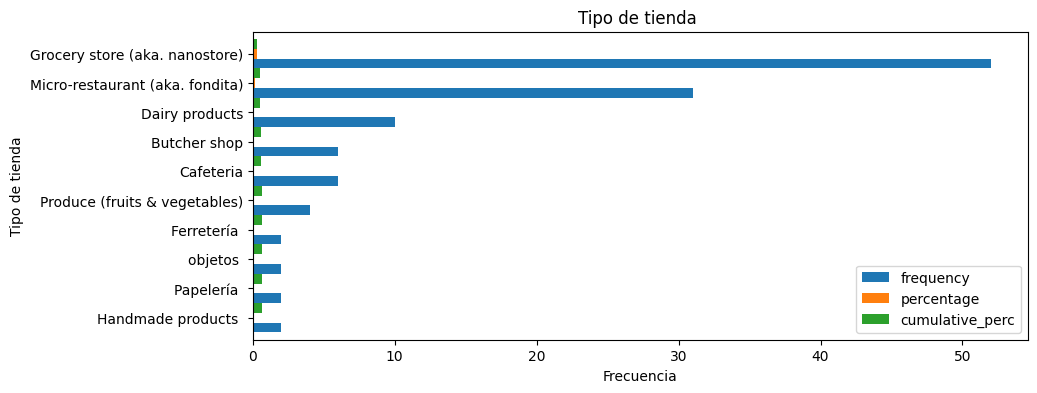

In [114]:
# Realizamos grafico de barras del dataframe filtrado
Filtro_index.plot.barh(width=1, figsize=(10,4))
plt.title('Tipo de tienda ')
plt.xlabel('Frecuencia')
plt.ylabel('Tipo de tienda')

### Tipo de tienda 
#### En la siguiente gráfica podemos visualizar que el tipo de tienda más frecuente es el denominado grocery store (tiendita), seguido de el micro-restaurante o la fondita y de las tiendas de leche, quesos, etc 

# Análisis 2: Canales de venta 

In [115]:
#Obtengo un análisis univariado de una variable categórica en específico
store = freq_tbl(Mretail['210_sales_channels'])
# Filtro para obtener las frecuencias más significativas 
Filtro= store[store['frequency']>3]
Filtro
#Ajusto el indice de mi dataframe
Filtro_index_1= Filtro.set_index('210_sales_channels')
# Ordenar el dataframe filtrado por la columna de frecuencia de forma descendente
# Para esta visualización omitimos los valores desconocidos
Filtro_index_1 = Filtro_index_1.sort_values(by="frequency", ascending=True)
Filtro_index_1 = Filtro_index_1.drop("Desconocido")
Filtro_index_1

,frequency,percentage,cumulative_perc
210_sales_channels,,,
Llamada a Teléfono celular,5,0.029240,0.795322
"Llamada a Teléfono celular,Redes sociales (e.g. Facebook, Instagram),WhatsApp",5,0.029240,0.824561
Llamada a Teléfono fijo,6,0.035088,0.730994
"Llamada a Teléfono celular,WhatsApp",6,0.035088,0.766082
"Redes sociales (e.g. Facebook, Instagram),WhatsApp",9,0.052632,0.695906
WhatsApp,10,0.058480,0.643275
"Redes sociales (e.g. Facebook, Instagram)",11,0.064327,0.584795


Text(0, 0.5, 'Canales utilizados')

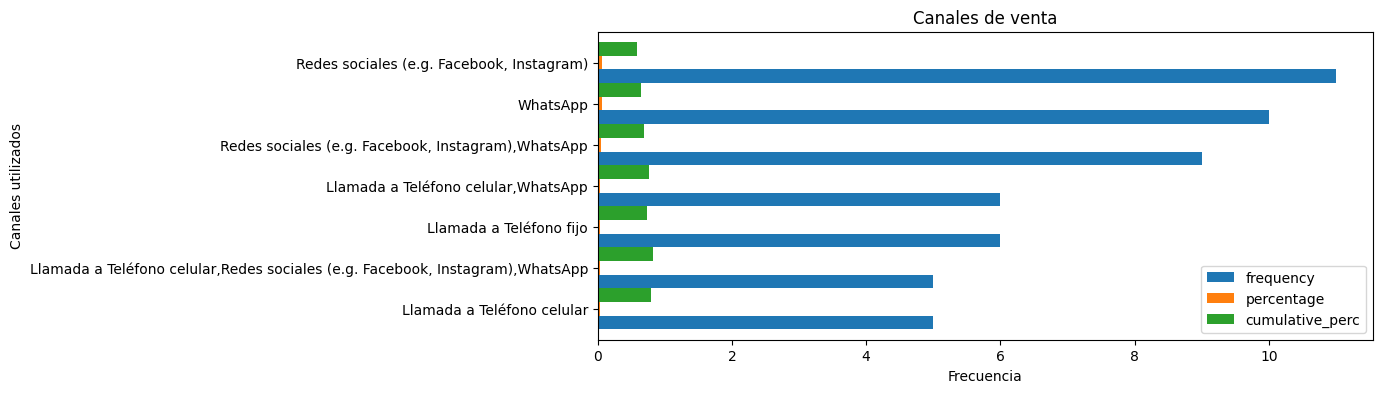

In [116]:
# Realizamos grafico de barras del dataframe filtrado
Filtro_index_1.plot.barh(width=1, figsize=(10,4))
plt.title('Canales de venta')
plt.xlabel('Frecuencia')
plt.ylabel('Canales utilizados')

### Canales de venta 
#### Esta visualización nos permite identificar que el canal de venta más común de utilizado por los negocios son las redes sociales, seguidas de la comunicación por WhatsApp. También podemos observar que una gran mayoría de negocios utilizan estos dos canales de manera combinada. 

# Análisis 3: Métodos de pago

In [117]:
#Obtengo un análisis univariado de una variable categórica en específico
store = freq_tbl(Mretail['189_payment_methods'])
# Filtro para obtener las frecuencias más significativas 
Filtro= store[store['frequency']>3]
Filtro
#Ajusto el indice de mi dataframe
Filtro_index_2= Filtro.set_index('189_payment_methods')
# Ordenar el dataframe filtrado por la columna de frecuencia de forma descendente
# Para esta visualización omitimos los valores desconocidos
Filtro_index_2 = Filtro_index_2.sort_values(by="frequency", ascending=True)
Filtro_index_2 = Filtro_index_2.drop("Desconocido")
Filtro_index_2

,frequency,percentage,cumulative_perc
189_payment_methods,,,
"Efectivo,Transferencia interbancaria",15,0.087719,0.982456
"Efectivo,Tarjeta de débito y/o crédito",19,0.111111,0.894737
"Efectivo,Tarjeta de débito y/o crédito,Transferencia interbancaria",30,0.175439,0.783626
Efectivo,40,0.233918,0.608187


In [118]:
#Realizamos grafico de pastel del dataframe filtrado 
# Dibujar el gráfico circular
Filtro_index_2 = Filtro_index_2.reset_index()
fig = px.pie(Filtro_index_2, names="189_payment_methods", values="frequency", color_discrete_sequence=['#FEBFB3', '#E1396C', '#96D38C', '#D0F9B1'])

# Especificar el tamaño del agujero central
fig.update_traces(hole=0.4)
# Añadimos un título 
fig.update_layout(title_text="Métodos de pago")

# Mostrar el gráfico de anillo
fig.show()

### Métodos de pago 
#### Para este conjunto de datos, el principal método de pago fue el efectivo. Seguido de la combinación de efectivo, tarjeta de crédito o débito y transferencia interbancaria 

# Análisis 4: Herramientas de relación con clientes

In [119]:
#Obtengo un análisis univariado de una variable categórica en específico
store = freq_tbl(Mretail['214_customer_relationship_tools'])
# Filtro para obtener las frecuencias más significativas 
Filtro= store[store['frequency']>3]
Filtro
#Ajusto el indice de mi dataframe
Filtro_index_3= Filtro.set_index('214_customer_relationship_tools')
# Ordenar el dataframe filtrado por la columna de frecuencia de forma descendente
# Para esta visualización omitimos los valores desconocidos
Filtro_index_3 = Filtro_index_3.sort_values(by="frequency", ascending=True)
Filtro_index_3 = Filtro_index_3.drop("Desconocido")
Filtro_index_3

,frequency,percentage,cumulative_perc
214_customer_relationship_tools,,,
Cuaderno,6,0.035088,0.953216
"Aplicación móvil,Redes sociales",13,0.076023,0.918129
Ninguna,20,0.116959,0.842105
Aplicación móvil,21,0.122807,0.725146
Redes sociales,27,0.157895,0.602339


In [120]:
# Dibujar el treemap
# Convertir el índice en una columna normal
Filtro_index_3 = Filtro_index_3.reset_index()
fig = px.treemap(Filtro_index_3, path=["214_customer_relationship_tools"], values="frequency", color_discrete_sequence=['#FEBFB3', '#E1396C', '#96D38C', '#D0F9B1'])
# Añadimos un título 
fig.update_layout(title_text="Herramientas de relación con clientes")
fig.show()

### Herramientas de relación con clientes 
#### Para relacionarse con sus clientes la mayoría de pequeños negocios utiliza las redes sociales, seguido de las aplicaciones móviles. Es interesante que el 11% de los negocios no utiliza herramientas para relacionarse con los clientes. 

# Análisis 5: Registros de inventarios

In [121]:
#Obtengo un análisis univariado de una variable categórica en específico
store = freq_tbl(Mretail['49_inventory_records'])
# Filtro para obtener las frecuencias más significativas 
Filtro= store[store['frequency']>3]
Filtro
#Ajusto el indice de mi dataframe
Filtro_index_4= Filtro.set_index('49_inventory_records')
# Ordenar el dataframe filtrado por la columna de frecuencia de forma descendente
# Para esta visualización omitimos los valores desconocidos
Filtro_index_4 = Filtro_index_4.sort_values(by="frequency", ascending=True)
Filtro_index_4 = Filtro_index_4.drop("Desconocido")
Filtro_index_4

,frequency,percentage,cumulative_perc
49_inventory_records,,,
"En Excel,En papel",7,0.040936,0.976608
No lo hago,18,0.105263,0.935673
En Excel,20,0.116959,0.830409
Software especializado + computadora,21,0.122807,0.713450
En papel,40,0.233918,0.590643


In [122]:
# Dibujar el gráfico circular
Filtro_index_4 = Filtro_index_4.reset_index()
fig = px.pie(Filtro_index_4, names="49_inventory_records", values="frequency", color_discrete_sequence=['#FEBFB3', '#E1396C', '#96D38C', '#D0F9B1'])

# Especificar el tamaño del agujero central
fig.update_traces(hole=0.4)
# Añadimos un título 
fig.update_layout(title_text="¿Cómo se llevan los registros de inventarios?")

# Mostrar el gráfico de anillo
fig.show()

### Registros de inventario 
#### El 37.7% de los pequeños negocios llevan los registros de inventario en papel. Aproximadamente el 20% utiliza alguna clase de software especializado más computadora. El 19% utiliza Excel. Y un 17% de estos, no lleva registros de inventario. 
#### (Porcentajes en proporcion a los datos filtrados)

# Análisis 6: Registros de ventas 

In [123]:
#Obtengo un análisis univariado de una variable categórica en específico
store = freq_tbl(Mretail['18_sales_records'])
# Filtro para obtener las frecuencias más significativas 
Filtro= store[store['frequency']>3]
Filtro
#Ajusto el indice de mi dataframe
Filtro_index_5= Filtro.set_index('18_sales_records')
# Ordenar el dataframe filtrado por la columna de frecuencia de forma descendente
# Para esta visualización omitimos los valores desconocidos
#Filtro_index_5 = Filtro_index_5.sort_values(by="frequency", ascending=True)
Filtro_index_5 = Filtro_index_5.drop("Desconocido")
Filtro_index_5

,frequency,percentage,cumulative_perc
18_sales_records,,,
En papel,47,0.274854,0.631579
Software especializado + computadora,22,0.128655,0.760234
No lo hago,14,0.081871,0.842105
En Excel,10,0.058480,0.900585
Caja registradora (análoga),4,0.023392,0.923977
"En Excel,En papel",4,0.023392,0.947368


In [124]:
# Dibujar el gráfico de barras
Filtro_index_5 = Filtro_index_5.reset_index()

fig = px.bar(data_frame= Filtro_index_5, x="18_sales_records",y="frequency", color_discrete_sequence=['#E1396C', '#96D38C', '#D0F9B1'])
# Añadimos un título 
fig.update_layout(title_text="¿Cómo se llevan los registros de ventas?")
# Mostrar el gráfico de barras
fig.update_layout(plot_bgcolor='white')
fig.show()

### Registros de ventas 
#### Tal como se puede observar en la gráfica de barras, la mayoría de los registros de las ventas se hacen en papel. Seguido de software especializado + computador. Es importante destacar que una buena parte de los pequeños negocios no realizan el registro de las ventas. 

# Análisis 7: Exhibición de productos afuera del negocio 

In [125]:
#Obtengo un análisis univariado de una variable categórica en específico
store = freq_tbl(Mretail['99_does_the_micro_retailer_exhibits_products_outside_'])
# Filtro para obtener las frecuencias más significativas 
Filtro= store[store['frequency']>3]
Filtro
#Ajusto el indice de mi dataframe
Filtro_index_6= Filtro.set_index('99_does_the_micro_retailer_exhibits_products_outside_')
# Ordenar el dataframe filtrado por la columna de frecuencia de forma descendente
# Para esta visualización omitimos los valores desconocidos
Filtro_index_6 = Filtro_index_6.sort_values(by="frequency", ascending=True)
Filtro_index_6

,frequency,percentage,cumulative_perc
99_does_the_micro_retailer_exhibits_products_outside_,,,
yes,51,0.298246,1.000000
no,120,0.701754,0.701754


In [126]:
# Dibujar el gráfico circular
Filtro_index_6 = Filtro_index_6.reset_index()
fig = px.pie(Filtro_index_6, names="99_does_the_micro_retailer_exhibits_products_outside_", values="frequency",  color_discrete_sequence=['#FEBFB3', '#E1396C', '#96D38C', '#D0F9B1'])
fig.update_layout(title_text="¿Se exhiben productos afuera del negocio?")
# Especificar el tamaño del agujero central
fig.update_traces(hole=0.4)

# Mostrar el gráfico de anillo
fig.show()

### Exhibición de productos fuera del negocio
#### Como se observa en nuestra gráfica de anillo, la gran mayoría de pequeños negocios (70.2%) no exhiben sus productos afuera del negocio. Mientras que el resto si lo hace. 

# Análisis 8: Venta de productos frescos 

In [127]:

#Obtengo un análisis univariado de una variable categórica en específico
store = freq_tbl(Mretail['102_does_the_micro_retailer_sells_fresh_products_'])
# Filtro para obtener las frecuencias más significativas 
Filtro= store[store['frequency']>3]
Filtro
#Ajusto el indice de mi dataframe
Filtro_index_7= Filtro.set_index('102_does_the_micro_retailer_sells_fresh_products_')
# Ordenar el dataframe filtrado por la columna de frecuencia de forma descendente
# Para esta visualización omitimos los valores desconocidos
Filtro_index_7 = Filtro_index_7.sort_values(by="frequency", ascending=True)
Filtro_index_7

,frequency,percentage,cumulative_perc
102_does_the_micro_retailer_sells_fresh_products_,,,
yes,66,0.385965,1.000000
no,105,0.614035,0.614035


In [128]:
# Dibujar el gráfico circular
Filtro_index_7 = Filtro_index_7.reset_index()
fig = px.pie(Filtro_index_7, names="102_does_the_micro_retailer_sells_fresh_products_", values="frequency",  color_discrete_sequence=['#FEBFB3', '#E1396C', '#96D38C', '#D0F9B1'])
fig.update_layout(title_text="¿Se venden productos frescos?")
# Especificar el tamaño del agujero central
fig.update_traces(hole=0.4)

# Mostrar el gráfico de anillo
fig.show()

### Venta de productos frescos 
#### Como se observa en nuestra gráfica de anillo, la gran mayoría de pequeños negocios (61.4%) no venden productos frescos. Mientras que el resto (38.6% de los negocios) si lo hace. 

# Análisis 9: Utilización de los registros de ventas 

In [129]:
Mretail["155_sales_registers_used_for"].unique()
#Obtengo un análisis univariado de una variable categórica en específico
store = freq_tbl(Mretail['155_sales_registers_used_for'])
# Filtro para obtener las frecuencias más significativas 
Filtro= store[store['frequency']>=1]
Filtro
#Ajusto el indice de mi dataframe
Filtro_index_8= Filtro.set_index('155_sales_registers_used_for')
# Ordenar el dataframe filtrado por la columna de frecuencia de forma descendente
# Para esta visualización omitimos los valores desconocidos
#Filtro_index_5 = Filtro_index_5.sort_values(by="frequency", ascending=True)
#Filtro_index_8 = Filtro_index_8.drop("Desconocido")
Filtro_index_8

,frequency,percentage,cumulative_perc
155_sales_registers_used_for,,,
Desconocido,165,0.964912,0.964912
No los uso,4,0.023392,0.988304
Se lleva al día,1,0.005848,0.994152
PEPS,1,0.005848,1.000000


In [130]:
# Dibujar el gráfico de barras
Filtro_index_8 = Filtro_index_8.reset_index()

fig = px.bar(data_frame= Filtro_index_8, x="155_sales_registers_used_for",y="frequency", color_discrete_sequence=['#E1396C', '#96D38C', '#D0F9B1'])
# Añadimos un título 
fig.update_layout(title_text="Utilización de los registros de venta")
# Mostrar el gráfico de barras
fig.update_layout(plot_bgcolor='white')
fig.show()

### Utilización de registros de venta  
#### Al incluir esta variable y visualizarla, el propósito fue mostrar como se desconoce lo que la mayoría de los pequeños negocios hacen con sus registros de ventas. 

# Análisis 10: Herramientas de planeación de ventas

In [131]:
#Obtengo un análisis univariado de una variable categórica en específico
store = freq_tbl(Mretail['193_sales_planning_tools'])
# Filtro para obtener las frecuencias más significativas 
Filtro= store[store['frequency']>=3]
Filtro
#Ajusto el indice de mi dataframe
Filtro_index_9= Filtro.set_index('193_sales_planning_tools')
# Ordenar el dataframe filtrado por la columna de frecuencia de forma descendente
# Para esta visualización omitimos los valores desconocidos
#Filtro_index_5 = Filtro_index_5.sort_values(by="frequency", ascending=True)
Filtro_index_9 = Filtro_index_9.drop("Desconocido")
Filtro_index_9

,frequency,percentage,cumulative_perc
193_sales_planning_tools,,,
Ninguna,33,0.192982,0.713450
Cuaderno,21,0.122807,0.836257
Software especializado,6,0.035088,0.871345
Excel,6,0.035088,0.906433
"Cuaderno,Excel",3,0.017544,0.923977


In [132]:
# Dibujar el gráfico de barras
Filtro_index_9 = Filtro_index_9.reset_index()

fig = px.bar(data_frame= Filtro_index_9, x="193_sales_planning_tools",y="frequency", color_discrete_sequence=['#E1396C', '#96D38C', '#D0F9B1'])
# Añadimos un título 
fig.update_layout(title_text="Herramientas de planeación de ventas")
# Mostrar el gráfico de barras
fig.update_layout(plot_bgcolor='white')
fig.show()

### Herramientas de planeación de ventas  
#### Como se observa en la gráfica anterior, el 20% de los negocios no utilizan herramientas de planeación de ventas. Únicamente un 12% de los negocios utilizan un cuaderno para ello, o el 3% hace uso de software especializado/ Excel. 
#### Porcentajes en relación a los filtros realizados 

# Análisis 11: Herramientas de planeación de compras 

In [133]:
#Obtengo un análisis univariado de una variable categórica en específico
store = freq_tbl(Mretail['192_procurement_planning_tools'])
# Filtro para obtener las frecuencias más significativas 
Filtro= store[store['frequency']>=3]
Filtro
#Ajusto el indice de mi dataframe
Filtro_index_10= Filtro.set_index('192_procurement_planning_tools')
# Ordenar el dataframe filtrado por la columna de frecuencia de forma descendente
# Para esta visualización omitimos los valores desconocidos
#Filtro_index_5 = Filtro_index_5.sort_values(by="frequency", ascending=True)
Filtro_index_10 = Filtro_index_10.drop("Desconocido")
Filtro_index_10

,frequency,percentage,cumulative_perc
192_procurement_planning_tools,,,
Cuaderno,25,0.146199,0.748538
Ninguna,24,0.140351,0.888889
Excel,6,0.035088,0.923977
Software especializado,4,0.023392,0.947368


In [134]:
# Dibujar el gráfico de barras
Filtro_index_10 = Filtro_index_10.reset_index()

fig = px.bar(data_frame= Filtro_index_10, x="192_procurement_planning_tools",y="frequency", color_discrete_sequence=['#E1396C', '#96D38C', '#D0F9B1'])
# Añadimos un título 
fig.update_layout(title_text="Herramientas de planeación de compras")
# Mostrar el gráfico de barras
fig.update_layout(plot_bgcolor='white')
fig.show()

### Herramientas de planeación de compras  
#### Como se observa en la gráfica anterior, alrededor del 14% de los negocios utilizan cuadernos como su herramienta de planeación de compras. Otro 14% no hace uso de herramientas para planear sus compras. Únicamente un 5% de los negocios utilizan Excel para ello o software especializado. 
#### Porcentajes en relación a los filtros realizados 

# Análisis 12: Espacio adicional de inventario

In [135]:
#Obtengo un análisis univariado de una variable categórica en específico
store = freq_tbl(Mretail['162_inventory_extra_space'])
# Filtro para obtener las frecuencias más significativas 
Filtro= store[store['frequency']>=3]
Filtro
#Ajusto el indice de mi dataframe
Filtro_index_11= Filtro.set_index('162_inventory_extra_space')
# Ordenar el dataframe filtrado por la columna de frecuencia de forma descendente
# Para esta visualización omitimos los valores desconocidos
#Filtro_index_5 = Filtro_index_5.sort_values(by="frequency", ascending=True)
Filtro_index_11 = Filtro_index_11.drop("Desconocido")
Filtro_index_11

,frequency,percentage,cumulative_perc
162_inventory_extra_space,,,
0,29,0.169591,0.649123
20%,20,0.116959,0.766082
10%,17,0.099415,0.865497
30%,10,0.058480,0.923977
50% +,9,0.052632,0.976608
40%,3,0.017544,0.994152


In [136]:
# Dibujar el gráfico circular
Filtro_index_11 = Filtro_index_11.reset_index()
fig = px.pie(Filtro_index_11, names="162_inventory_extra_space", values="frequency",  color_discrete_sequence=['#FEBFB3', '#E1396C', '#96D38C', '#D0F9B1'])
fig.update_layout(title_text="Espacio adicional de inventario")
# Especificar el tamaño del agujero central
fig.update_traces(hole=0.4)
# Mostrar el gráfico de anillo
fig.show()

### Espacio adicional inventario  
#### El 33% de los negocios de nuestra información filtrado no poseen espacio adicional de inventario. El 22.7% tiene un 20% de espacio extra, el 19.3% un 10% extra. La minoría de los negocios tienen porcentajes que van del 30% al 50%

#### Se realiza una función para facilitar la obtención de filtros

In [137]:
def analisis_univariado(columna):
    store = freq_tbl(Mretail[columna])
    Filtro = store[store['frequency'] >= 3]
    Filtro_index = Filtro.set_index(columna)
    Filtro_index = Filtro_index.drop("Desconocido", errors='ignore')
    return Filtro_index

variables = ['250_technology_investment_operations', '261_technology_organization', '264_technology_budget', '249_technology_training', '186_internet_connection', '33_credit_to_customers', '227_agreement_ecommerce_platforms', "79_delivery_vehicle"]

resultados = {}
for variable in variables:
    resultados[variable] = analisis_univariado(variable)

# Análisis 13: Crédito a los clientes 

In [138]:
# Dibujar el gráfico circular
Filtro_index_12 = resultados["33_credit_to_customers"].reset_index()
fig = px.pie(Filtro_index_12, names="33_credit_to_customers", values="frequency",  color_discrete_sequence=['#FEBFB3', '#E1396C', '#96D38C', '#D0F9B1'])
fig.update_layout(title_text="Crédito a clientes")
# Especificar el tamaño del agujero central
fig.update_traces(hole=0.4)
# Mostrar el gráfico de anillo
fig.show()

### Crédito a los clientes 
#### El 74.8% de los negocios de nuestra información filtrado no ofrecen crédito a sus clientes. Sólo el 25.2% de los pequeños negocios de nuestra información filtrada lo hacen 

# Análisis 14: Conexión a internet 

In [139]:
# Dibujar el gráfico circular
Filtro_index_13 = resultados["186_internet_connection"].reset_index()
fig = px.pie(Filtro_index_13, names="186_internet_connection", values="frequency",  color_discrete_sequence=['#E1396C', '#FEBFB3', '#96D38C', '#D0F9B1'])
fig.update_layout(title_text="Conexión a internet")
# Especificar el tamaño del agujero central
fig.update_traces(hole=0.4)
# Mostrar el gráfico de anillo
fig.show()

### Conexión a internet 
#### El 70.4% de los negocios de nuestra información filtrada tienen acceso a internet. Por otro lado, aproximadamente el 30% de ellos no cuentan con una conexión a internet. 

# Análisis 15: Acuerdo con plataforma de e-commerce

In [140]:
# Dibujar el gráfico circular
Filtro_index_14 = resultados["227_agreement_ecommerce_platforms"].reset_index()
fig = px.pie(Filtro_index_14, names="227_agreement_ecommerce_platforms", values="frequency", color_discrete_sequence=['#FEBFB3', '#E1396C', '#96D38C', '#D0F9B1'])
fig.update_layout(title_text="Acuerdo con platafroma de e-commerce")
# Especificar el tamaño del agujero central
fig.update_traces(hole=0.4)
# Mostrar el gráfico de anillo
fig.show()

### Acuerdos con platafromas de comercio electrónico 
#### Aproximadamente el 90% de los negocios de nuestra información filtrada no tienen algún acuerdo con una plataforma de comercio electrónico. Únicamente el 10% de ellos tienen algún acuerdo. 

# Análisis 16: Presupuesto en tecnología 

In [141]:
# Dibujar el gráfico de barras
Filtro_index_15 = resultados["264_technology_budget"].reset_index()

fig = px.bar(data_frame= Filtro_index_15, x="264_technology_budget",y="frequency", color_discrete_sequence=['#E1396C', '#96D38C', '#96D38C', '#96D38C'])
# Añadimos un título 
fig.update_layout(title_text="Presupuesto en tecnología")
# Mostrar el gráfico de barras
num_barras = len(Filtro_index_15)
colores = ['#E1396C'] + ['#96D38C'] * (num_barras - 1)
fig.update_layout(plot_bgcolor='white')
fig.update_traces(marker_color= colores)
fig.show()

In [154]:
resultados["264_technology_budget"].sum()

frequency          70.000000
percentage          0.409357
cumulative_perc     4.485380
dtype: float64

### Presupuesto en tecnología
#### La visualización nos permite ver que 39 de 70 negocios consideran una idea poco atractiva establecer un presupuesto en tecnología. Mientras que 24 de 70 piensan que es una buena idea. 

# Análisis 17: Entrenamiento en tecnología  

In [142]:
# Dibujar el gráfico de barras
Filtro_index_16 = resultados["249_technology_training"].reset_index()

fig = px.bar(data_frame= Filtro_index_16, x="249_technology_training",y="frequency", color_discrete_sequence=['#E1396C', '#96D38C', '#96D38C', '#96D38C'])
# Añadimos un título 
fig.update_layout(title_text="Entrenamiento en tecnología")
# Mostrar el gráfico de barras
num_barras = len(Filtro_index_15)
colores = ['#E1396C'] + ['#96D38C'] * (num_barras - 1)
fig.update_layout(plot_bgcolor='white')
fig.update_traces(marker_color= colores)
fig.show()

### Entrenamiento en tecnología 
#### Interesantemente podemos observar que la mayoría 37/72 de los pequeños negocios están totalmente de acuerdo con la idea de tener un entrenamiento en tecnología. Cabe destacar que ningún dueño de negocio cree que esto sea una mala idea. 

# Análisis 18: Inversión en tecnología  

In [143]:
# Dibujar el gráfico de barras
Filtro_index_17 = resultados["250_technology_investment_operations"].reset_index()

fig = px.bar(data_frame= Filtro_index_17, x="250_technology_investment_operations",y="frequency", color_discrete_sequence=['#E1396C', '#96D38C', '#96D38C', '#96D38C'])
# Añadimos un título 
fig.update_layout(title_text="Inversión en tecnología")
# Mostrar el gráfico de barras
num_barras = len(Filtro_index_15)
colores = ['#E1396C'] + ['#96D38C'] * (num_barras - 1)
fig.update_layout(plot_bgcolor='white')
fig.update_traces(marker_color= colores)
fig.show()

### Inversión en tecnología 
#### Interesantemente podemos observar que la mayoría 37/74 de los pequeños negocios están totalmente de acuerdo con la idea de invertir en tecnología. 14 dueños de pequeños negocios creen que es una idea poco atractiva. 

# Análisis 19: Organización tecnológica  

In [144]:
# Dibujar el gráfico de barras
Filtro_index_18 = resultados["261_technology_organization"].reset_index()

fig = px.bar(data_frame= Filtro_index_18, x="261_technology_organization",y="frequency", color_discrete_sequence=['#E1396C', '#96D38C', '#96D38C', '#96D38C'])
# Añadimos un título 
fig.update_layout(title_text="Organización tecnológica")
# Mostrar el gráfico de barras
num_barras = len(Filtro_index_15)
colores = ['#E1396C'] + ['#96D38C'] * (num_barras - 1)
fig.update_layout(plot_bgcolor='white')
fig.update_traces(marker_color= colores)
fig.show()

### Organización tecnológica 
#### Interesantemente podemos observar que la mayoría 58/74 de los pequeños negocios están de acuerdo con la idea de tener ayudar a su negocio a organzarse con herramientas tecnológicas. 9 dueños de pequeños negocios creen que es una idea poco atractiva. 

# Análisis 20: Vehículo de entrega

In [153]:
Mretail.groupby("79_delivery_vehicle").count()

,232_type_of_store,186_internet_connection,210_sales_channels,189_payment_methods,33_credit_to_customers,214_customer_relationship_tools,227_agreement_ecommerce_platforms,193_sales_planning_tools,192_procurement_planning_tools,162_inventory_extra_space,264_technology_budget,249_technology_training,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,49_inventory_records,18_sales_records,155_sales_registers_used_for,250_technology_investment_operations,261_technology_organization
79_delivery_vehicle,,,,,,,,,,,,,,,,,,,
Automóvil,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Desconocido,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169,169
El cliente los recoge en tienda,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


### Vehículo de entrega
#### Se decidió no hacer visualización para esta columna ya que la mayoría de sus valores son desconocidos 